In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle

In [17]:
df=pd.read_csv('train.csv')

In [18]:
df.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [19]:
df.shape

(800, 22)

In [20]:
#Displaying all coulumns
pd.set_option('display.max_columns',None)

In [21]:
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


In [22]:
#convert age to int datatype
df['age']=df['age'].astype(int)

In [23]:
for col in df.columns:
    numerical_features=['ID','age','gender']

    if col not in numerical_features:
        print(col,df[col].unique())
        print('-'*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim ['no' 'yes']
--------------------------------------------------
con

In [24]:
df=df.drop(columns=['ID','age_desc'])

In [25]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [26]:
df.replace({'contry_of_res':{'Viet Nam':'vietnam','AmericanSamoa':'UnitedStates','Hong Kong':'china'}},inplace=True)

In [27]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,16,m,Hispanic,no,no,New Zealand,no,12.999501,Self,0
796,0,1,1,0,0,1,0,1,1,1,20,m,White-European,no,no,Cyprus,no,13.561518,Self,0
797,0,0,0,0,0,0,0,0,0,0,5,m,South Asian,yes,no,New Zealand,no,2.653177,Self,0
798,0,0,0,0,0,0,0,0,0,0,16,f,?,no,no,Canada,no,9.069342,Self,0


In [28]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'UnitedStates', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'china',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [29]:
#target class

df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


Text(0.5, 1.0, 'Histplot for age')

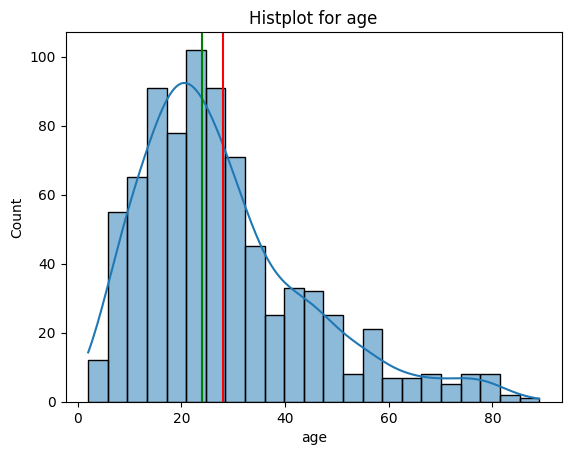

In [30]:
#age column

sns.histplot(df['age'],kde=True)

age_mean=df['age'].mean()
age_median=df['age'].median()

plt.axvline(age_mean,color='red',label='mean')
plt.axvline(age_median,color='green',label='median')


plt.title('Histplot for age')


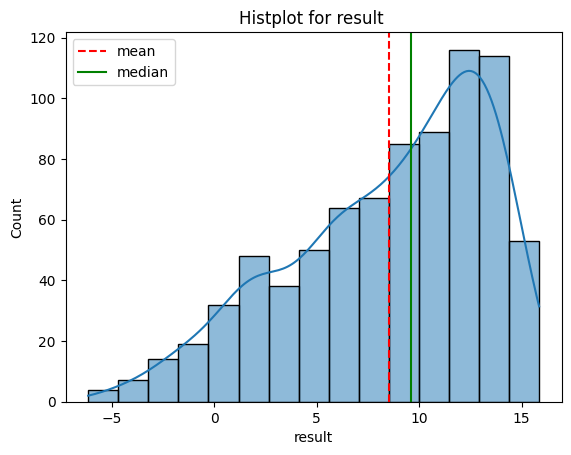

In [31]:
#result colummn

sns.histplot(df['result'],kde=True)

age_mean=df['result'].mean()
age_median=df['result'].median()

plt.axvline(age_mean,color='red',linestyle='--',label='mean')
plt.axvline(age_median,color='green',label='median')

plt.title('Histplot for result ')

plt.legend()

Text(0.5, 1.0, 'Box plot for age')

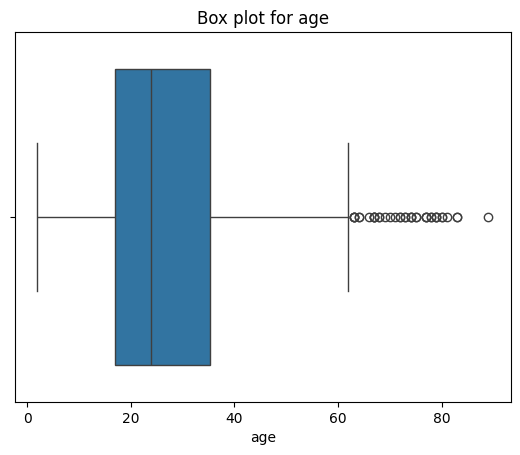

In [32]:
#Identifying outliers for age column

sns.boxplot(x=df['age'])
plt.title('Box plot for age')

Text(0.5, 1.0, 'Box plot for result')

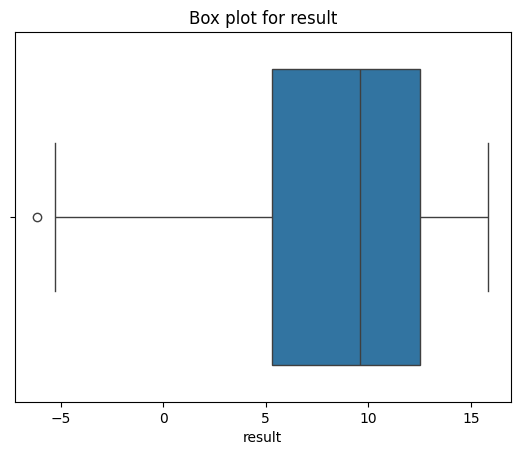

In [33]:
#Identifying outliers for result column

sns.boxplot(x=df['result'])
plt.title('Box plot for result')

In [34]:
#counting outliers for age using IQR method

q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)

iqr=q3-q1

lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

age_outliers=df[(df['age']<lower_bound)|(df['age']>upper_bound)]

len(age_outliers)

39

In [35]:
#counting outliers fro result using IQR method

q1=df['result'].quantile(0.25)
q3=df['result'].quantile(0.75)

iqr=q3-q1

lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

age_outliers=df[(df['result']<lower_bound)|(df['result']>upper_bound)]

len(age_outliers)

1

In [36]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

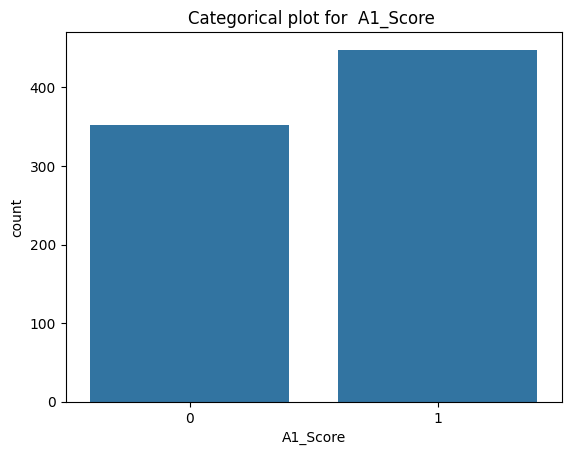

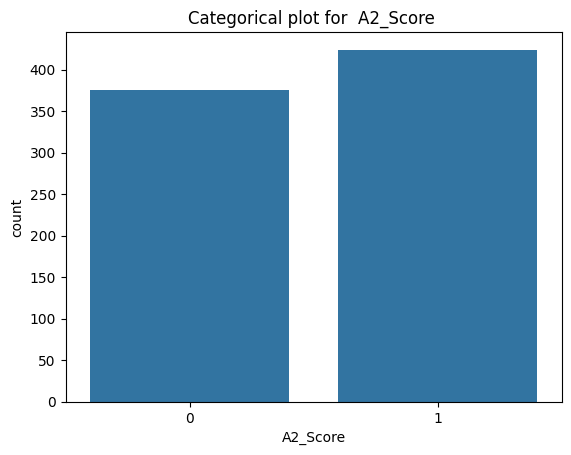

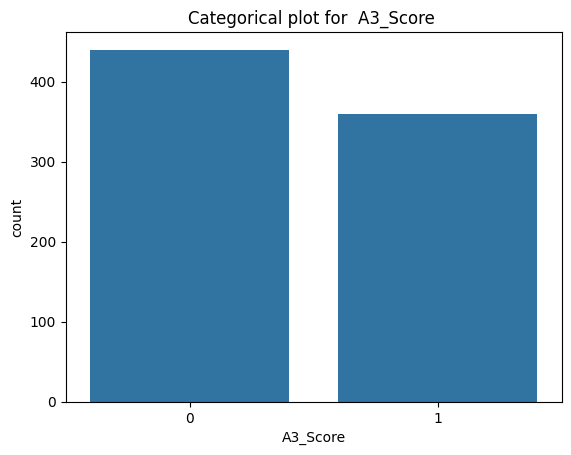

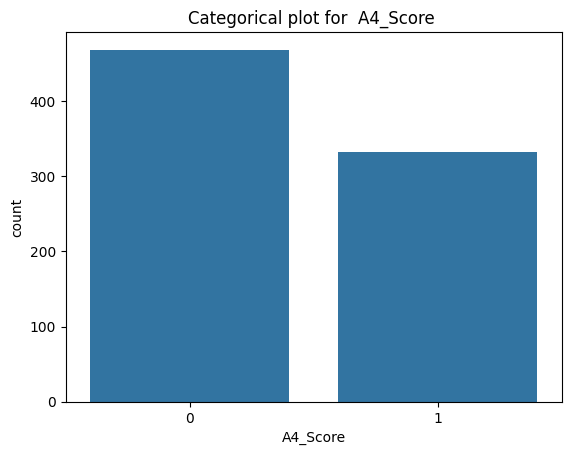

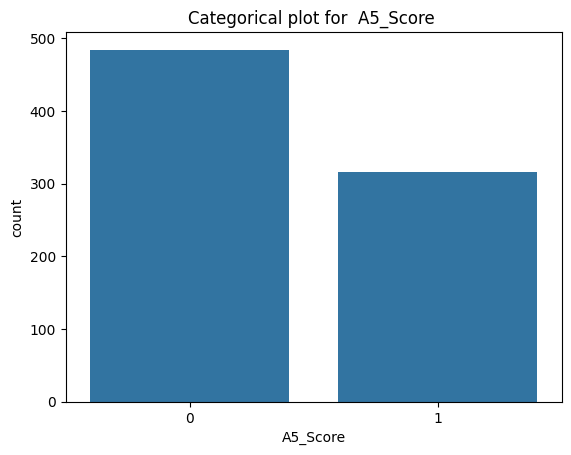

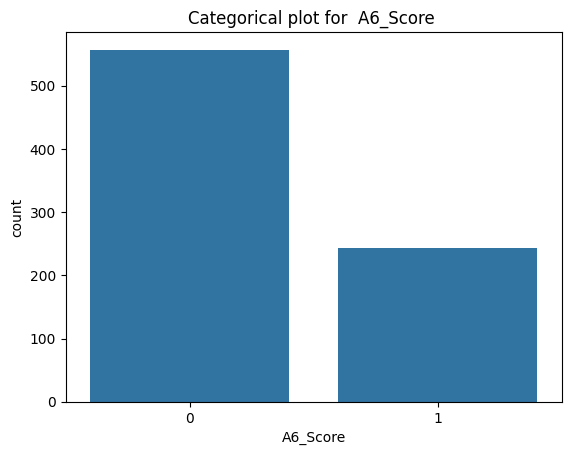

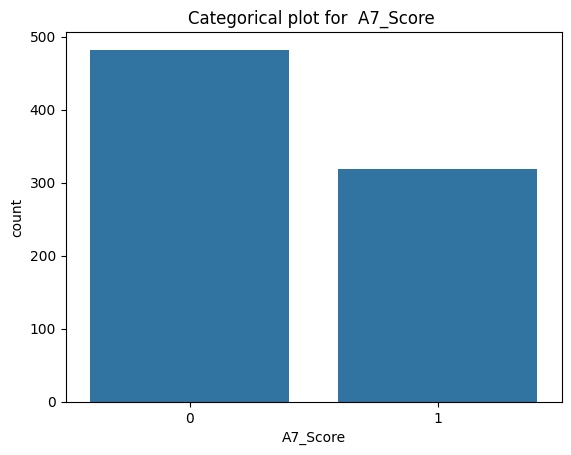

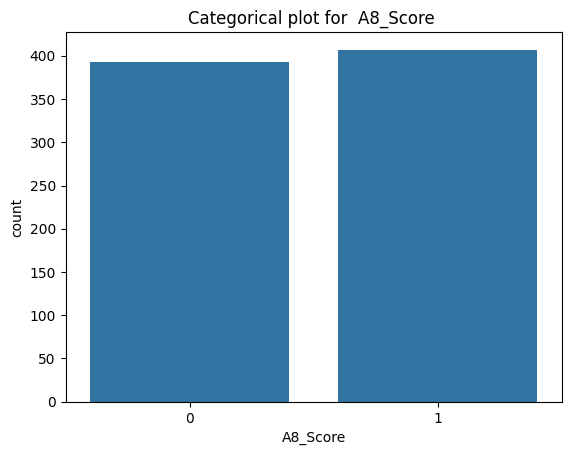

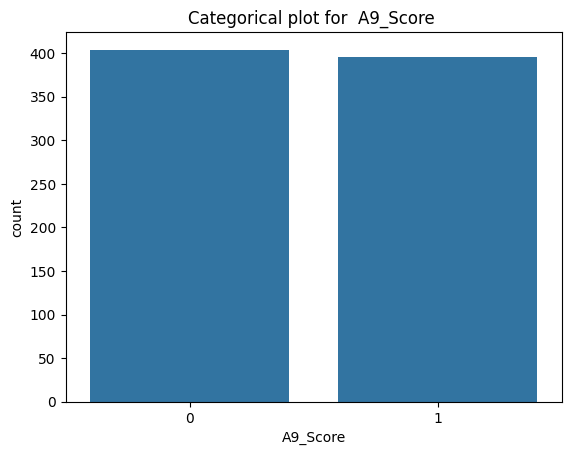

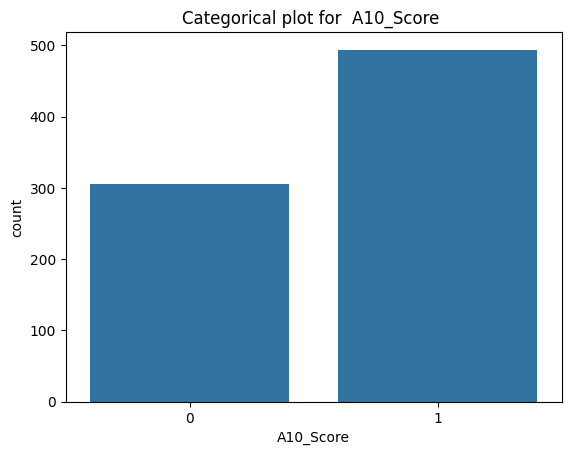

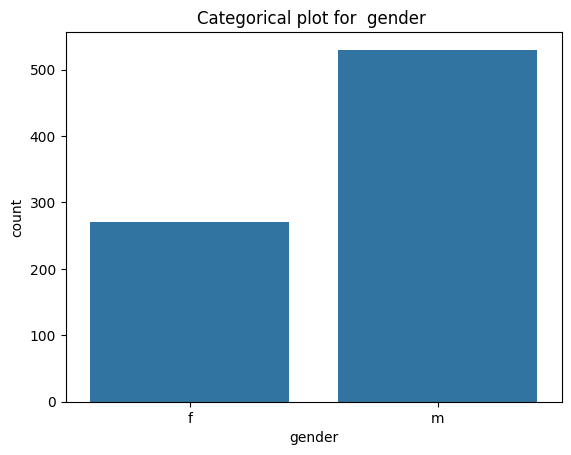

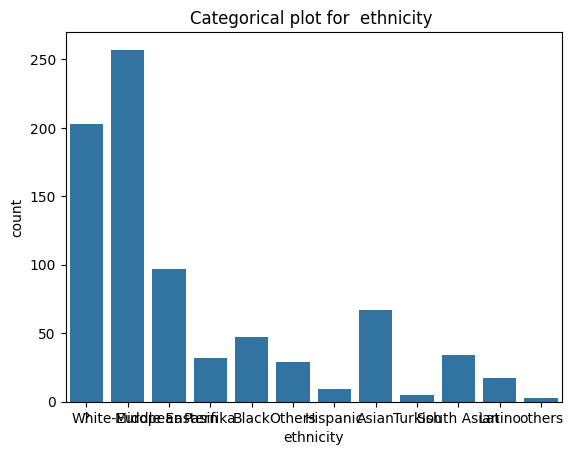

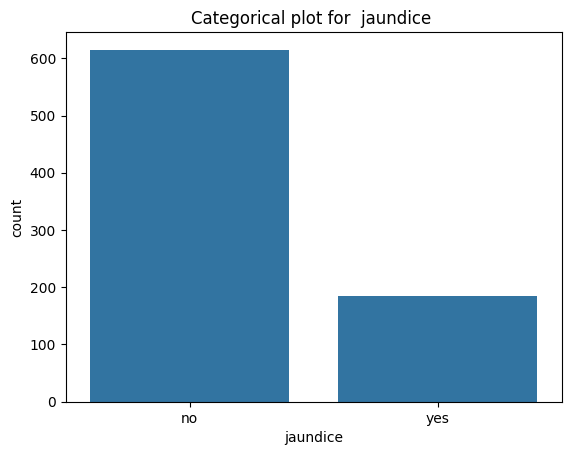

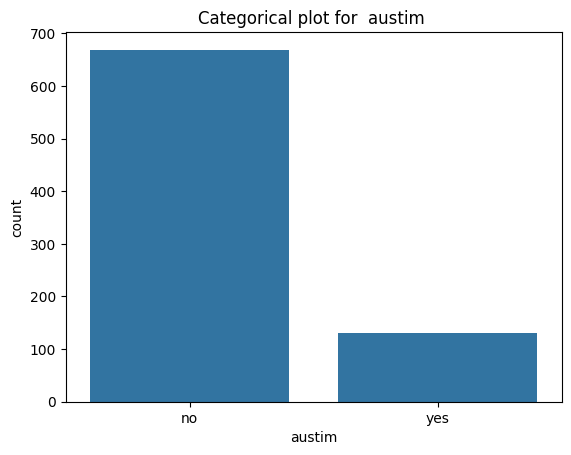

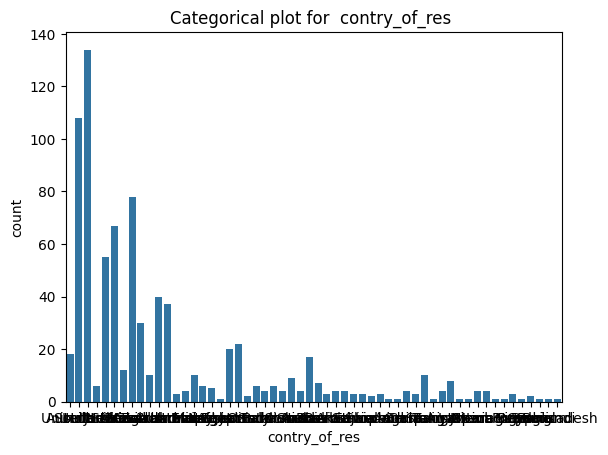

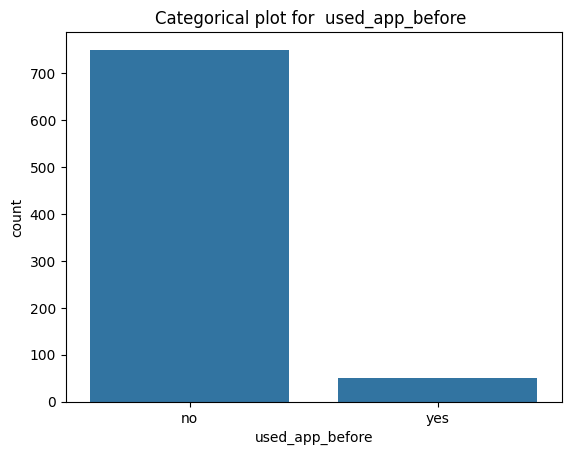

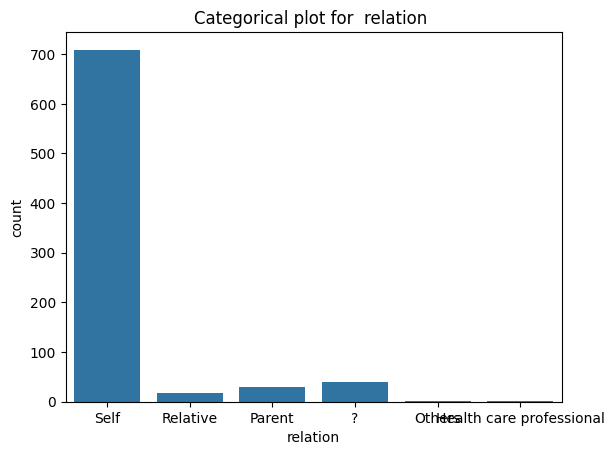

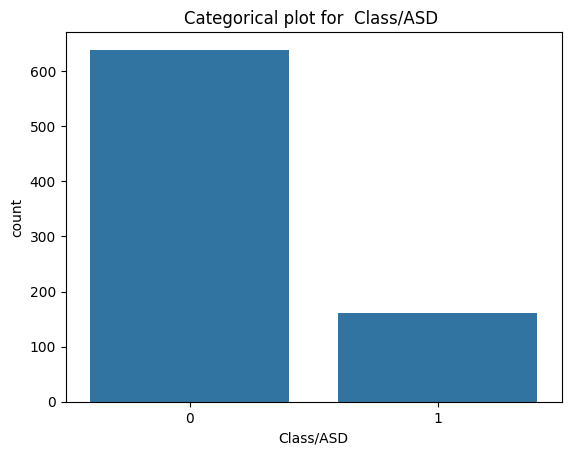

In [37]:
#dealing with categorical columns

categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',  'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
        'relation', 'Class/ASD']

for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f'Categorical plot for  {col} ')
    plt.xlabel(col)
    plt.show()


In [38]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [39]:
df.replace({'ethnicity':{'?':'Others','others':'Others'}},inplace=True)

In [40]:
df['relation'].value_counts()

,count
relation,
Self,709
?,40
Parent,29
Relative,18
Others,2
Health care professional,2


In [41]:
df.replace({'relation':{'?':'Others','Parent':'Others','Relative':'Others','Health care professional':'Others'}},inplace=True)

In [42]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [43]:
#label Encoding

object_columns=df.select_dtypes(include=['object']).columns

In [44]:
object_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [45]:
encoders={}

for col in object_columns:
    label_encoder=LabelEncoder()
    df[col]=label_encoder.fit_transform(df[col])
    encoders[col]=label_encoder

with open ('encoders.pk1','wb') as f:
    pickle.dump(encoders,f)


In [46]:
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


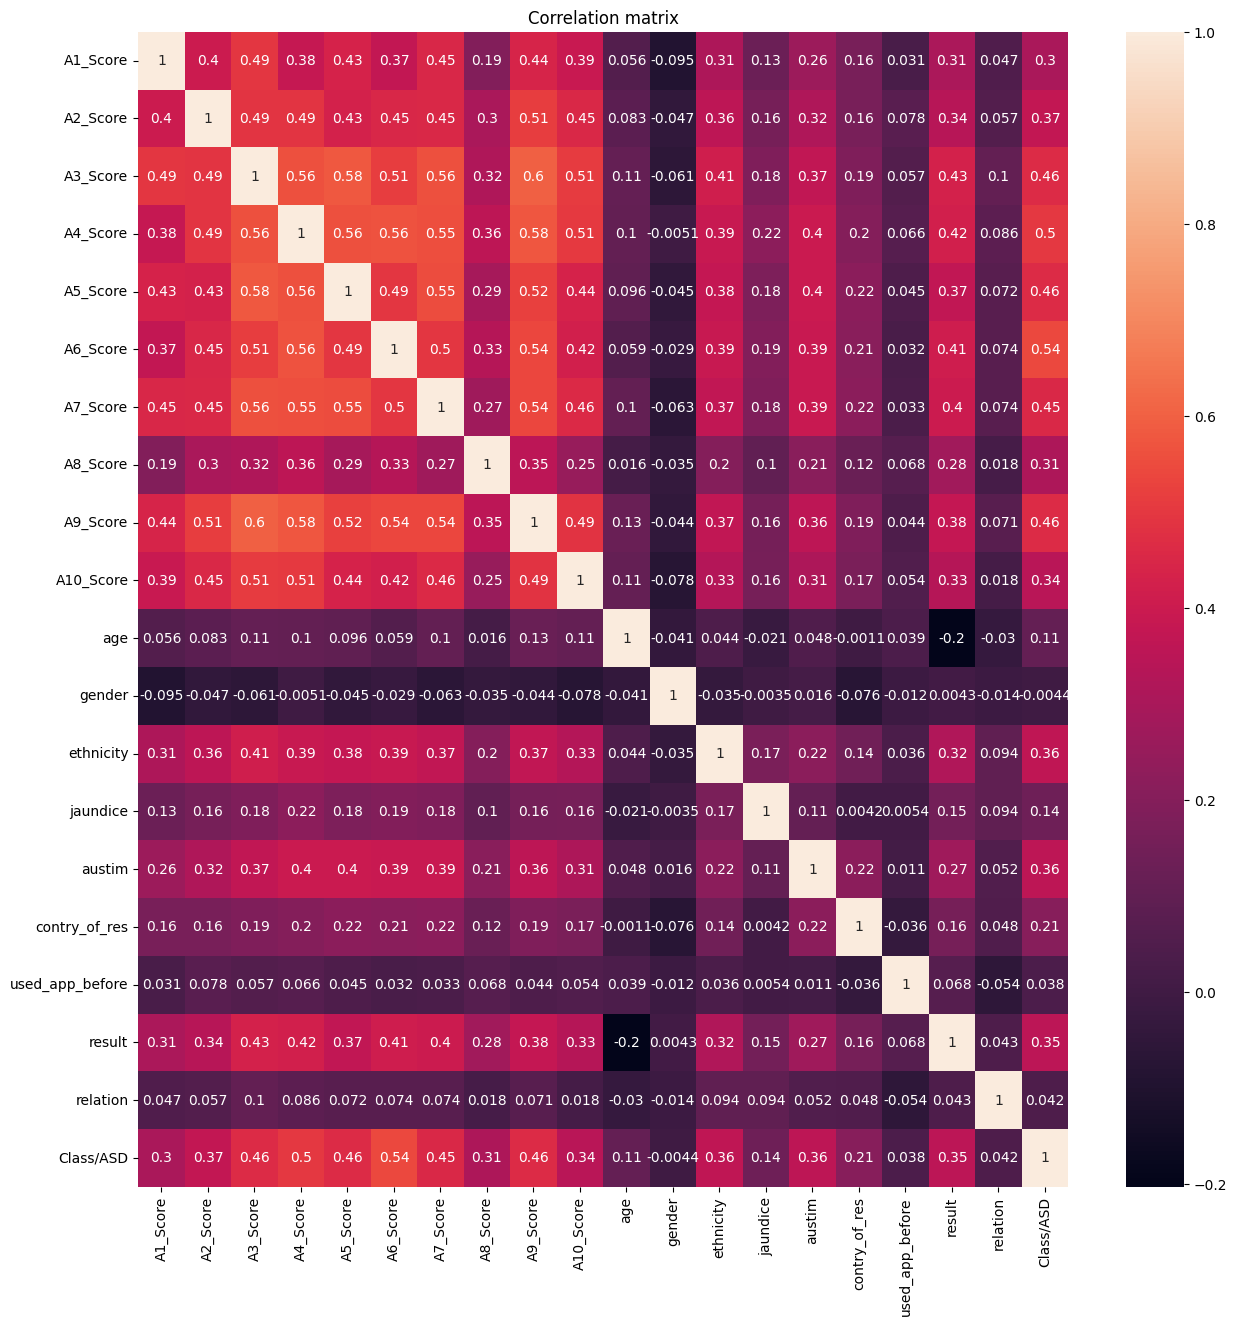

In [47]:
#correlation matrix

plt.figure(figsize=(15,15))

sns.heatmap(df.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

In [48]:
#Function to replace outliers with median

def replace_outliers_with_meidan(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)

    iqr=q3-q1

    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr

    median=df[col].median()

    df[col]=df[col].apply(lambda x: median if x<lower_bound or x>upper_bound else x)

    return df

In [49]:
df=replace_outliers_with_meidan(df,"age")
df=replace_outliers_with_meidan(df,"result")

In [50]:
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [51]:
df.shape

(800, 20)

In [52]:
x=df.drop(columns='Class/ASD')
y=df['Class/ASD']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [53]:
print(y_train.shape)
print(y_test.shape)
print(y)

(640,)
(160,)
0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [54]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [55]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


In [56]:
#SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to deal with imbalanced classification datasets
#— especially when you have far fewer examples of one class (minority class) compared to the other (majority class).


smote=SMOTE(random_state=42)





In [57]:
x_train_smote,y_train_smote=smote.fit_resample(x_train , y_train)

In [58]:
y_train_smote.value_counts()

,count
Class/ASD,
1,515
0,515


In [59]:
cv_score={}

models={'Decission Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest':RandomForestClassifier(random_state=42),
        'XGB Classifier':XGBClassifier(random_state=42)
         }

for model_name,model in models.items():
    print()
    print(f'Training {model_name} with default parameters....')
    print()
    scores=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring='accuracy')
    cv_score[model_name]=scores
    print(f'{model_name} cross validation accuracy score: {np.mean(scores):.2f}')


Training Decission Tree with default parameters....

Decission Tree cross validation accuracy score: 0.86

Training Random Forest with default parameters....

Random Forest cross validation accuracy score: 0.92

Training XGB Classifier with default parameters....

XGB Classifier cross validation accuracy score: 0.90


In [60]:
#Hyperparameters
decision_tree=DecisionTreeClassifier(random_state=42)
Randomforest=RandomForestClassifier(random_state=42)
xgboost=XGBClassifier(random_state=42)


In [61]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}


In [62]:
random_search_dt=RandomizedSearchCV(decision_tree,param_grid_dt,n_iter=20,cv=5,scoring='accuracy',random_state=42)
random_search_rf=RandomizedSearchCV(Randomforest,param_grid_rf,n_iter=20,cv=5,scoring='accuracy',random_state=42)
random_search_xgb=RandomizedSearchCV(xgboost,param_grid_rf,n_iter=20,cv=5,scoring='accuracy',random_state=42)

In [63]:
random_search_dt.fit(x_train_smote,y_train_smote)
random_search_rf.fit(x_train_smote,y_train_smote)
random_search_xgb.fit(x_train_smote,y_train_smote)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:31:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:31:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:31:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:31:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/pytho

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 50, 70],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [64]:
best_model=None
best_score=0

if random_search_dt.best_score_>best_score:
    best_model=random_search_dt.best_estimator_
    best_score=random_search_dt.best_score_

if random_search_rf.best_score_>best_score:
    best_model=random_search_rf.best_estimator_
    best_score=random_search_rf.best_score_

In [65]:
print(f'Best Model: {best_model}')
print(f'Best cross validation accuarcy: {best_score}.2f')

Best Model: RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)
Best cross validation accuarcy: 0.9165048543689321.2f


In [66]:
#predictions
y_test_pred=best_model.predict(x_test)
print('ACCURACY:\n',accuracy_score(y_test,y_test_pred))
print('confusion Matrix:\n',confusion_matrix(y_test,y_test_pred))
print('classification report: \n',classification_report(y_test,y_test_pred))

ACCURACY:
 0.825
confusion Matrix:
 [[107  17]
 [ 11  25]]
classification report: 
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       124
           1       0.60      0.69      0.64        36

    accuracy                           0.82       160
   macro avg       0.75      0.78      0.76       160
weighted avg       0.84      0.82      0.83       160



In [67]:
with open('best_model.pk1','wb') as f:
    pickle.dump(best_model,f)